# Event Related Potentials Compute and Plot
For this, will load in the .fif ica data, and then epoch is with different tmin and tmax, to account for the whole trial rather than just the imagination/perception phase (includes the visual or auditory noise mask). This will be different for audio and visual conditions. We use these epoch to plot the average ERP across participants.


<div>
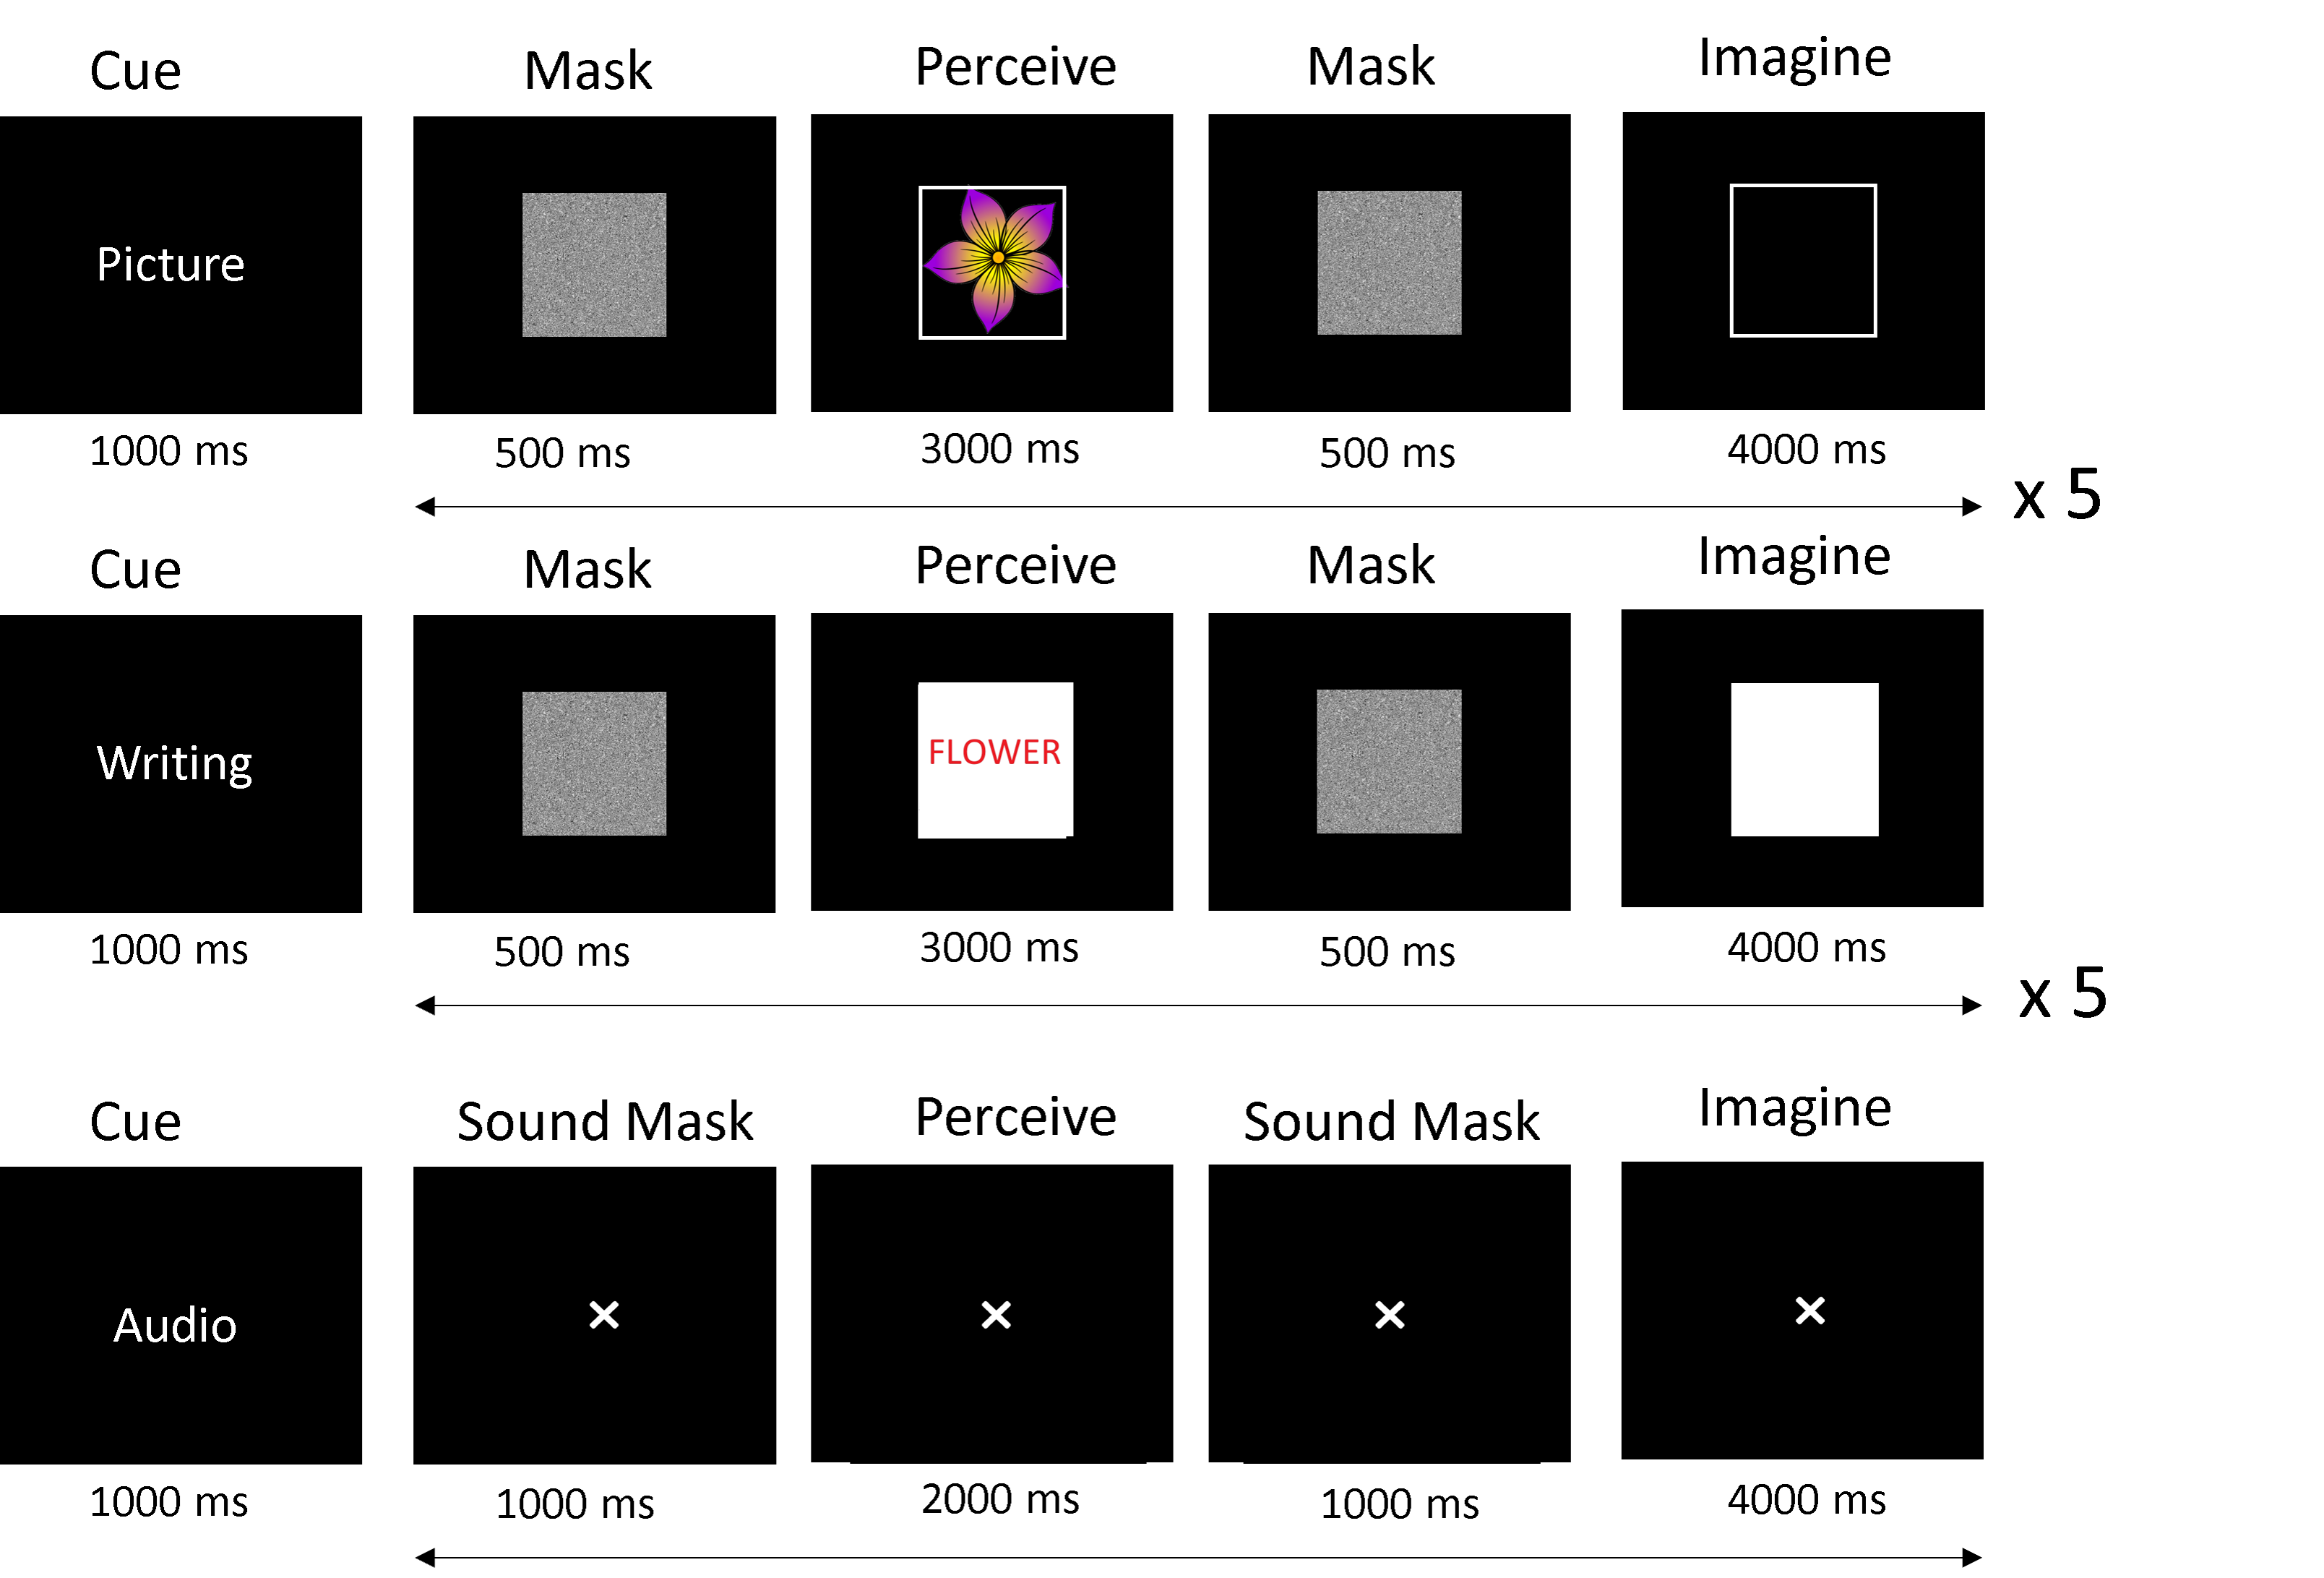
</div>

In [ ]:
import sys
import mne
from mne import preprocessing
import pandas as pd
from mne.io import read_raw_eeglab
from mne.io import eeglab
import numpy as np
import os.path
from os import path
from autoreject import get_rejection_threshold 

## Parameters

In [ ]:
# paremeters
cap_size = 'medium' # either 'small', 'medium' or 'large'
ppt_num = '10'
session = '1' #either 1, 2 or 3
pathdata = 'sub'+ppt_num+'_sess'+session+'_50_ica_eeg.fif' 
xpath = 'X:\\CompSci\\ResearchProjects\\EJONeill\\Neuroimaging\\multisensoryeeg\\openNeuro\\sourcedata\\preprocessed\\'
pathdata = xpath + pathdata
 

## Load Data

In [ ]:
raw = mne.io.read_raw_fif(pathdata)

## Epoching all the Data


In [ ]:
# start off by getting the 1000 ms befor every condition and the 4000 ms after - will adjust this later
events, event_ids = mne.events_from_annotations(raw, verbose = False)
print("The events...", events)
epochs = mne.Epochs(raw=raw, events=events, event_id=event_ids, preload=True, tmin = 1,tmax =4,baseline=None, event_repeated='merge')
reject = get_rejection_threshold(epochs, ch_types='eeg', decim=2)
epochs.drop_bad(reject=reject)
print("The number of distinct events, not trials :", len(event_ids)) # this will give the number of distinct events, not the amount of trials
print("The event names ", event_ids)

In [ ]:
imag_orthographic = []
imag_pictorial = []
imag_audio = []
perc_orthographic = []
perc_pictorial = []
perc_audio = []

for id in event_ids:
    if 'Imagination' in id:
        if '_t_' in id:
            imag_orthographic.append(id)
        elif '_image_'in id:
            imag_pictorial.append(id)
        elif '_a_' in id:
            imag_audio.append(id)
            else:
                print(id)
                   
    elif 'Perception' in id:
        if '_t_' in id:
            perc_orthographic.append(id)
        elif '_image_'in id:
            perc_pictorial.append(id)
        elif '_a_' in id:
            per _audio.append(id)
            else:
                print(id)
       

event_list = [imag_orthographic, imag_pictorial, imag_audio, perc_orthographic, perc_pictorial, perc_audio]
print("There should be 6 conditions: ", len(event_list))
for li in event_list:
    print("Amount of different types in each condition ",len(li))

In [ ]:
# merge all the trials into their conditions, do this inplace to save on memory load

mne.epochs.combine_event_ids(epochs, imag_orthographic, {'imag_orthographic': 302}, copy = False)
mne.epochs.combine_event_ids(epochs, imag_pictorial, {'imag_pictorial': 303}, copy = False)
mne.epochs.combine_event_ids(epochs, imag_audio, {'imag_audio': 304}, copy = False)
mne.epochs.combine_event_ids(epochs, perc_orthographic, {'perc_orthographic': 305}, copy = False)
mne.epochs.combine_event_ids(epochs, perc_pictorial, {'perc_pictorial': 305}, copy = False)
mne.epochs.combine_event_ids(epochs, perc_audio, {'perc_audio': 307}, copy = False)



In [ ]:
epochs_of_interest  = ['imag_orthographic', 'imag_pictorial', 'imag_audio', 'perc_orthographic', 'perc_pictorial', 'perc_audio']
epochs_sub = epochs[epochs_of_interest]

## Editing Durations to Include Masks

In [ ]:
imagine_orthographic_epochs = imag_orthographic.crop(tmin=0.5, tmax =4).average()
imagine_pictorial_epochs = imag_pictorial.crop(tmin=0.5, tmax =4).average()
imagine_audio_epochs = imag_audio.crop(tmin=1, tmax =4).average()


perception_orthographic_epochs = perc_orthographic.crop(tmin=0.5, tmax =3).average()
perception_pictorial_epochs = perc_pictorial.crop(tmin=0.5, tmax =3).average()
perception_audio_epochs = perc_audio.crop(tmin=1, tmax =2).average()


# Averaging ERPs
https://neuraldatascience.io/7-eeg/erp_averaging.html

In [1]:
imagine_orthographic_epochs.plot_joint()

SyntaxError: invalid syntax (2609793836.py, line 1)